In [18]:
import pandas as pd

# Análise de dados obtidos no dia 12/09/2024, referente aos vôos registrados com referência ao Aeroporto Internacional Afonso Pena (CWB), do município de São José dos Pinhais - PR

In [19]:
def translate_status(status):
    if status == "cancelled":
        return "Cancelado"
    elif status == "landed":
        return "Pousado"
    elif status == "scheduled":
        return "Agendado"
    elif status == "diverted":
        return "Desviado"
    elif status == "active":
        return "Em andamento"
    else:
        return "Desconhecido"

In [20]:
df = pd.read_json('info_flights.json')[['flight_date','flight_iata','flight_status','airline','dep_iata','dep_delay','arr_iata','arr_delay']]

In [21]:
df["flight_status"] = df["flight_status"].apply(translate_status)

## Informações gerais

In [22]:
print(f"Total de vôos registrados: {df.shape[0]}")
print(f"Total de vôos com partida de Curitiba (CWB): {df[df["dep_iata"] == "CWB"].shape[0]}")
print(f"Total de vôos com destino para Curitiba (CWB): {df[df["arr_iata"] == "CWB"].shape[0]}")
print(f"Média de tempo do atraso da saída: {df["dep_delay"].mean().round(2)} minutos")
print(f"Média de tempo do atraso da chegada: {df["arr_delay"].mean().round(2)} minutos")
print(f"Maior atraso de partida: {df["dep_delay"].max()} minutos ({round(df["dep_delay"].max()/60,2)} horas)")
print(f"Maior atraso de chegada: {df["arr_delay"].max()} minutos ({round(df["arr_delay"].max()/60,2)} horas)")

Total de vôos registrados: 683
Total de vôos com partida de Curitiba (CWB): 350
Total de vôos com destino para Curitiba (CWB): 333
Média de tempo do atraso da saída: 16.69 minutos
Média de tempo do atraso da chegada: 13.44 minutos
Maior atraso de partida: 455.0 minutos (7.58 horas)
Maior atraso de chegada: 123.0 minutos (2.05 horas)


É possível notar que a média dos atrasos de vôos no aeroporto são cerca de 15 minutos (tanto pra partida quanto pra chegada).
Também é possível notar que existe algum vôo (ou vôos) que estão distoando demais da média dos atrasos.

In [23]:
df[df["arr_delay"]== df["arr_delay"].max()]

,flight_date,flight_iata,flight_status,airline,dep_iata,dep_delay,arr_iata,arr_delay
337,"Wed, 11 Sep 2024 00:00:00 GMT",CV6823,Agendado,Cargolux,CWB,159.0,UIO,123.0


In [24]:
df[df["dep_delay"]== df["dep_delay"].max()]


,flight_date,flight_iata,flight_status,airline,dep_iata,dep_delay,arr_iata,arr_delay
428,"Thu, 12 Sep 2024 00:00:00 GMT",UC1825,Agendado,LATAM Cargo Chile,MIA,455.0,CWB,NaN


Olhando as duas pesquisas, é possível ver que os dois vôos com maior atraso (de partida e de chegada), são vôos internacionais em que:
- O vôo com o maior atraso de partida estaria saindo de Miami-EUA (MIA) e chegando em Curitiba-BRA (CWB)
- O vôo com o maior atraso de chegada estaria saindo de Curitiba-BRA (CWB) com destino para Quito-PER (UIO)

## Destino de Vôos partindo de Curitiba (CWB)

<Axes: xlabel='Código IATA', ylabel='Total vôos'>

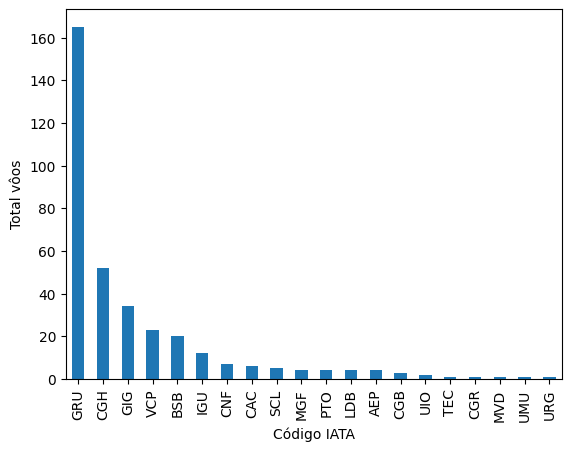

In [25]:
df[df["arr_iata"] != "CWB"]["arr_iata"].value_counts().plot(kind = 'bar', xlabel="Código IATA", ylabel = "Total vôos")

## Origem de vôos chegando em Curitiba (CWB)

<Axes: xlabel='Código IATA', ylabel='Total vôos'>

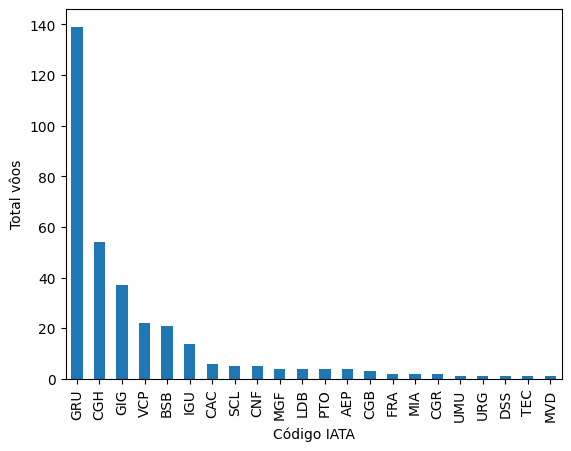

In [26]:
df[df["dep_iata"] != "CWB"]["dep_iata"].value_counts().plot(kind = 'bar', xlabel="Código IATA", ylabel = "Total vôos")

Analisando os dois gráficos acima, pode-se reparar que os aeroportos com que Curitiba tem mais conexão são os aeroportos de Guarulhos (GRU), Congonhas (CGH), Galeão (GIG), Viracopos (VCP) e Brasília (BSB), todos nacionais.

O aeroporto regional (estadual) com mais conexões seria o de Foz do Iguaçu (IGU) e o aeroporto internacional com mais conexões com Curitiba é o de Santiago-CHI (SCL).

## Média do tempo de atraso dos vôos

### Na Partida

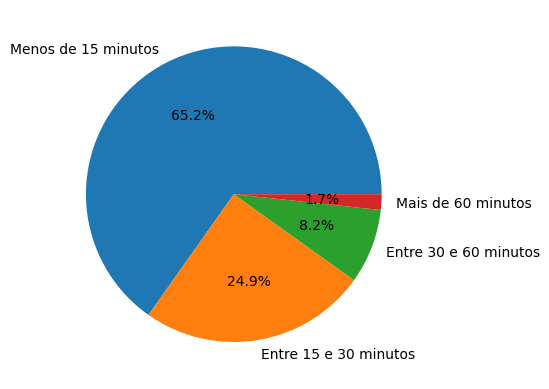

In [27]:
dfAtrasoDep = pd.DataFrame({
    "Tempo de Atraso":["Menos de 15 minutos", "Entre 15 e 30 minutos", "Entre 30 e 60 minutos", "Mais de 60 minutos"],
    "Total":[df.query("0 < dep_delay <= 15").shape[0],df.query("15 < dep_delay <= 30").shape[0],df.query("30 < dep_delay <= 60").shape[0],df.query("dep_delay > 60").shape[0]]
})
dfAtrasoDep.set_index("Tempo de Atraso").plot.pie(y = "Total", legend = False, autopct = '%1.1f%%').yaxis.set_visible(False)

In [28]:
print(f"Total de vôos com algum registro de atraso: {df.query("dep_delay > 0").shape[0]} vôos")
print(f"Total de vôos com atraso inferior a 15 minutos: {df.query("0 < dep_delay <= 15").shape[0]} vôos")
print(f"Total de vôos com atraso entre 15 e 30 minutos: {df.query("15 < dep_delay <= 30").shape[0]} vôos")
print(f"Total de vôos com atraso entre 30 e 60 minutos: {df.query("30 < dep_delay <= 60").shape[0]} vôos")
print(f"Total de vôos com atraso superior a 60 minutos: {df.query("dep_delay > 60").shape[0]} vôos")

Total de vôos com algum registro de atraso: 526 vôos
Total de vôos com atraso inferior a 15 minutos: 343 vôos
Total de vôos com atraso entre 15 e 30 minutos: 131 vôos
Total de vôos com atraso entre 30 e 60 minutos: 43 vôos
Total de vôos com atraso superior a 60 minutos: 9 vôos


### Na chegada

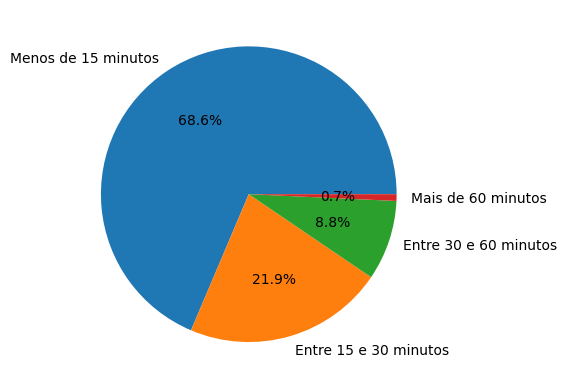

In [29]:
dfAtrasoArr = pd.DataFrame({
    "Tempo de Atraso":["Menos de 15 minutos", "Entre 15 e 30 minutos", "Entre 30 e 60 minutos", "Mais de 60 minutos"],
    "Total":[df.query("0 < arr_delay <= 15").shape[0],df.query("15 < arr_delay <= 30").shape[0],df.query("30 < arr_delay <= 60").shape[0],df.query("arr_delay > 60").shape[0]]
})
dfAtrasoArr.set_index("Tempo de Atraso").plot.pie(y = "Total", legend = False, autopct = '%1.1f%%').yaxis.set_visible(False)

In [30]:
print(f"Total de vôos com algum registro de atraso: {df.query("arr_delay > 0").shape[0]} vôos")
print(f"Total de vôos com atraso inferior a 15 minutos: {df.query("0 < arr_delay <= 15").shape[0]} vôos")
print(f"Total de vôos com atraso entre 15 e 30 minutos: {df.query("15 < arr_delay <= 30").shape[0]} vôos")
print(f"Total de vôos com atraso entre 30 e 60 minutos: {df.query("30 < arr_delay <= 60").shape[0]} vôos")
print(f"Total de vôos com atraso superior a 60 minutos: {df.query("arr_delay > 60").shape[0]} vôo")

Total de vôos com algum registro de atraso: 137 vôos
Total de vôos com atraso inferior a 15 minutos: 94 vôos
Total de vôos com atraso entre 15 e 30 minutos: 30 vôos
Total de vôos com atraso entre 30 e 60 minutos: 12 vôos
Total de vôos com atraso superior a 60 minutos: 1 vôo


Nota-se que tanto para a chegada quanto para a partida, a maioria dos vôos sofrem um pequeno atraso inferior a 15 minutos. Vale notar que 

## Total de vôos por status

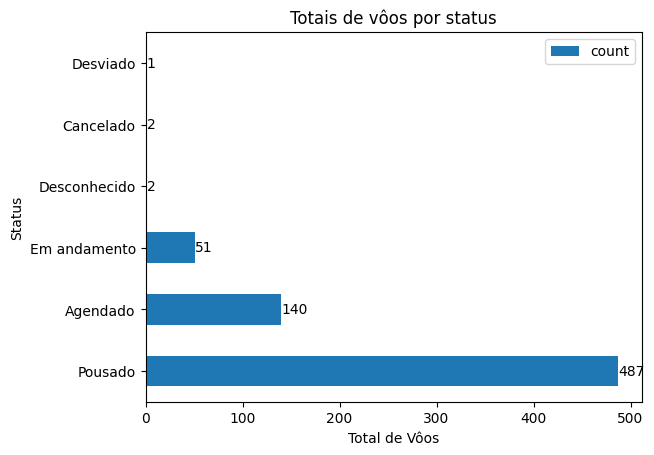

In [31]:
ax = df["flight_status"].value_counts().reset_index().set_index("flight_status").plot(kind = 'barh', xlabel = "Total de Vôos", ylabel = "Status", title = "Totais de vôos por status")

for c in ax.containers:
    ax.bar_label(c, label_type = 'edge')

A maioria dos vôos registrados já encontravam-se em seu destino final, com um pouco menos de um quarto deles ainda nem tinham saído de sua origem (Agendado). Pouco mais de 7% dos vôos registrados estavam em andamento (ou seja, poderiam estar decolando de sua origem ou já em vôo a caminho de seu destino).

## Total de vôos por Companhia Aérea

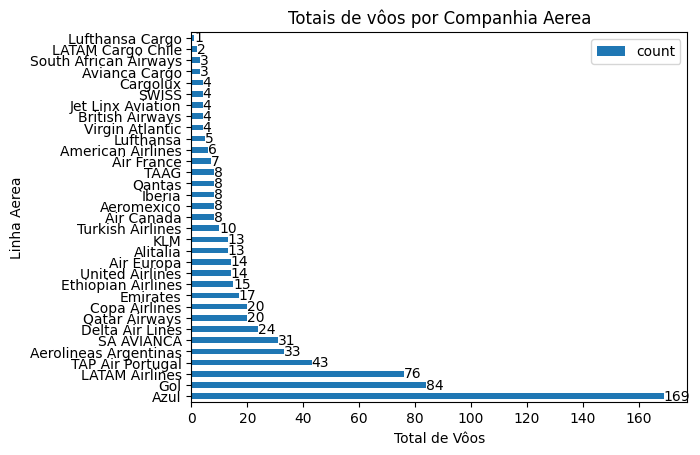

In [32]:
bx = df["airline"].value_counts().reset_index().set_index("airline").plot(kind = 'barh', xlabel = "Total de Vôos", ylabel = "Linha Aerea", title = "Totais de vôos por Companhia Aerea")

for c in bx.containers:
    bx.bar_label(c, label_type = 'edge')

Nesse gráfico, pode-se notar que a variedade de companhias aéreas que passam pelo aeroporto de Curitiba, e que um pouco mais de um terço dos vôos totais são de companhias aereas brasileiras (Azul e Gol)

## Média de Atraso de Chegada por cada Aeroporto

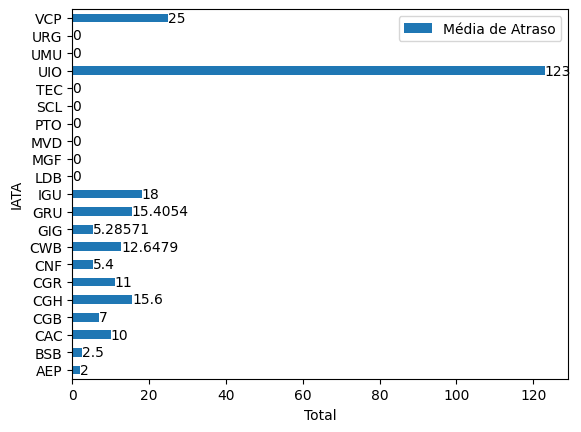

In [33]:
cx = df.groupby(["arr_iata"])["arr_delay"].mean().reset_index().rename(columns={"arr_delay":"Média de Atraso","arr_iata":"IATA"}).set_index("IATA").plot(kind = 'barh', xlabel = "Total", ylabel = "IATA")

for c in cx.containers:
    cx.bar_label(c, label_type = 'edge')

Desconsiderando a média do aeroporto de Quito (UIO), a maior média de atraso de vôos se encontra no aeroporto de Viracopos, em que ainda assim não passa de 30 minutos o valor.

## Média de Atraso de Partida por cada Aeroporto

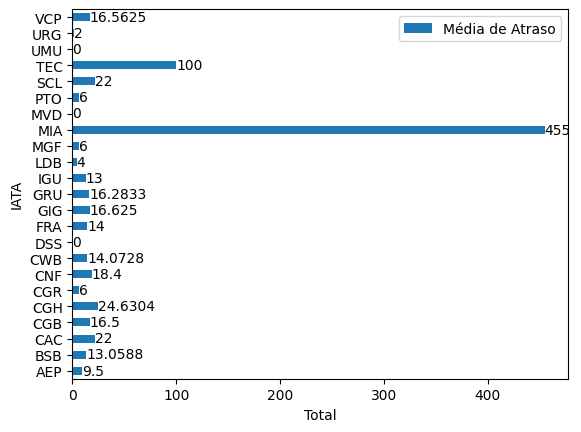

In [34]:
dx = df.groupby(["dep_iata"])["dep_delay"].mean().reset_index().rename(columns={"dep_delay":"Média de Atraso","dep_iata":"IATA"}).set_index("IATA").plot(kind = 'barh', xlabel = "Total", ylabel = "IATA")
for c in dx.containers:
    dx.bar_label(c, label_type = 'edge')

Desconsiderando o aeroporto de Miami (MIA), pode-se notar que com relação de partidas a média já sobe e que o aeroporto com a maior média de atraso passa a ser o de Telêmaco Borba (TEC).

## Conclusões

De acordo com as informações obtidas anteriormente, e com os valores e gráficos gerados, podemos chegar a algumas conclusões:

- A maior parte do público que frequenta o aeroporto de Curitiba são pessoas que vieram ou estão se direcionando a outros aeroportos nacionais

- A média de atraso no geral não acaba passando de 15 minutos, em que podem ocorrer alguns casos muito especiais de atraso

- O aeroporto com maior número de conexões é o aeroporto de Guarulhos, em São Paulo

- São várias companhias aéreas que passam pelo aeroporto de Curitiba, mas cerca de um terço são oriundas de companhias brasileiras